#**Task 1**

### 1. download dataset

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.core.debugger import set_trace
import pandas as pd
import numpy as np

# Using direct link to load data
url_pk_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
pk_raw = pd.read_csv(url_pk_data)

url_wdbc_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
wdbc_raw = pd.read_csv(url_wdbc_data, header = None)

wdbc_raw.columns = [f'f{i}' for i in range(wdbc_raw.shape[1])]
wdbc_raw = wdbc_raw.rename(columns={'f0': 'ID', 'f1': 'Diagnosis'})

Display the first 5 rows of the raw data

In [2]:
print("Parkinson’s raw data (first 5 rows):")
display(pk_raw.head())

print("\nWDBC raw data (first 5 rows):")
display(wdbc_raw.head())

Parkinson’s raw data (first 5 rows):


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361



WDBC raw data (first 5 rows):


,ID,Diagnosis,f2,f3,f4,f5,f6,f7,f8,f9,...,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 2. Clean the data, encoding, and scaling

In [3]:

# Replace '?' with NaN and drop nan
pk_cleaned = pk_raw.replace('?', np.nan).dropna()
wdbc_cleaned = wdbc_raw.replace('?', np.nan).dropna()

pk_target = pk_cleaned['motor_UPDRS']

# remove the subjects, targets...
# pk_features = pk_cleaned.drop(columns = ['motor_UPDRS', 'total_UPDRS','subject#'])
pk_features = pk_cleaned.drop(columns = ['motor_UPDRS','subject#'])


print("Parkinson’s cleaned data (first 5 rows):")
display(pk_features.head())
display(pk_target.head())

# remove ID
wdbc_cleaned = wdbc_cleaned.drop(columns = ['ID'])

# Encode the label
wdbc_cleaned['Diagnosis'] = wdbc_cleaned['Diagnosis'].replace({'M': 1, 'B': 0})
wdbc_target = wdbc_cleaned['Diagnosis']
wdbc_features = wdbc_cleaned.drop(columns = ['Diagnosis'])

wdbc_features.columns = [f'f{i}' for i in range(wdbc_features.shape[1])]

print("\nWDBC cleaned data (first 5 rows):")
display(wdbc_features.head())
display(wdbc_target.head())

Parkinson’s cleaned data (first 5 rows):


,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


,motor_UPDRS
0,28.199
1,28.447
2,28.695
3,28.905
4,29.187



WDBC cleaned data (first 5 rows):


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Diagnosis
0,1
1,1
2,1
3,1
4,1


In [4]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler2 = StandardScaler()

pk_features_scaled = scaler1.fit_transform(pk_features)

wdbc_features_scaled = scaler2.fit_transform(wdbc_features)


###3. Display basic stastic on data

In [5]:
print("Parkinson's Features Descriptive Statistics:")
display(pk_features.describe())

print("\nParkinson's Target Distribution:")
display(pk_target.value_counts())

print("\nWDBC Features Descriptive Statistics:")
display(wdbc_features.describe())

print("\nWDBC Target Distribution:")
display(wdbc_target.value_counts())

Parkinson's Features Descriptive Statistics:


,age,sex,test_time,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,64.804936,0.317787,92.863722,29.018942,0.006154,0.000044,0.002987,0.003277,0.008962,0.034035,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,8.821524,0.465656,53.445602,10.700283,0.005624,0.000036,0.003124,0.003732,0.009371,0.025835,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,36.000000,0.000000,-4.262500,7.000000,0.000830,0.000002,0.000330,0.000430,0.000980,0.003060,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,58.000000,0.000000,46.847500,21.371000,0.003580,0.000022,0.001580,0.001820,0.004730,0.019120,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,65.000000,0.000000,91.523000,27.576000,0.004900,0.000035,0.002250,0.002490,0.006750,0.027510,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,72.000000,1.000000,138.445000,36.399000,0.006800,0.000053,0.003290,0.003460,0.009870,0.039750,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,85.000000,1.000000,215.490000,54.992000,0.099990,0.000446,0.057540,0.069560,0.172630,0.268630,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730



Parkinson's Target Distribution:


,count
motor_UPDRS,
15.0000,143
12.0000,131
31.0000,90
18.0000,82
6.0000,72
...,...
25.6620,1
9.9402,1
7.3451,1



WDBC Features Descriptive Statistics:


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



WDBC Target Distribution:


,count
Diagnosis,
0,357
1,212


Parkinson’s features distribution:


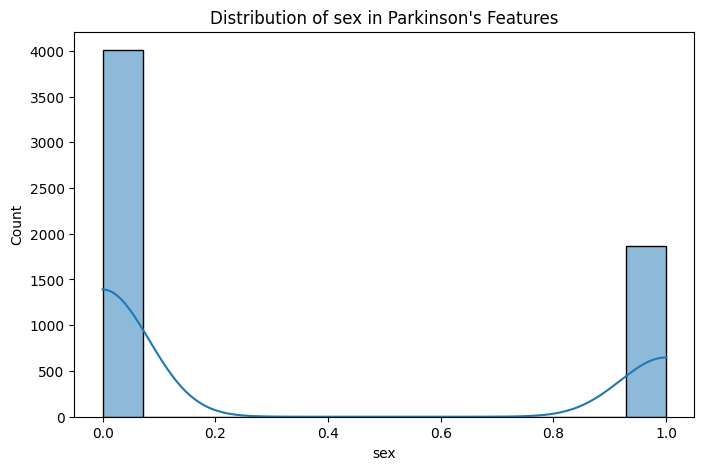

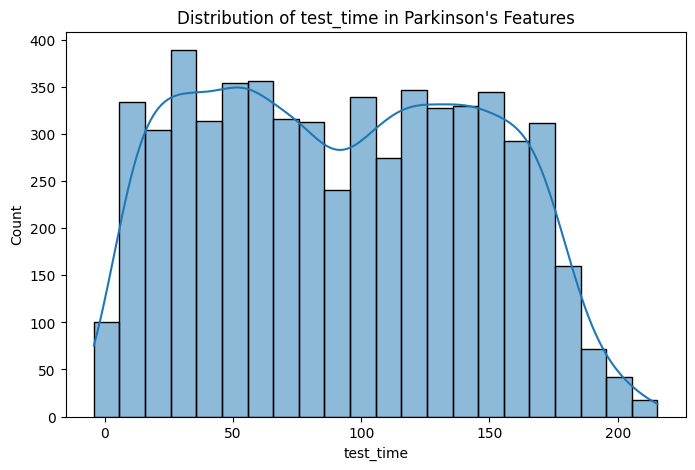

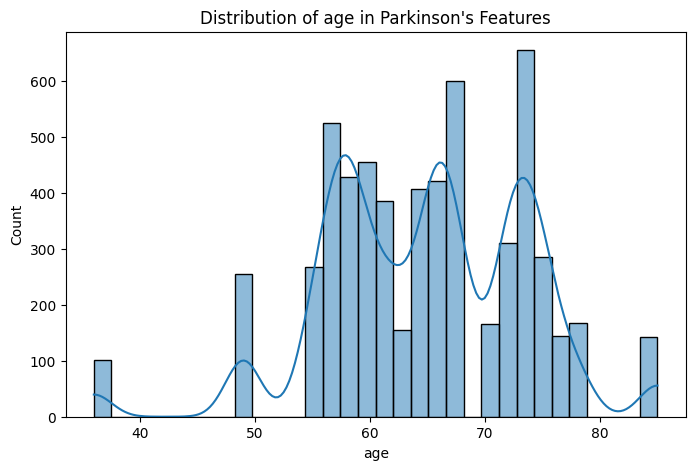

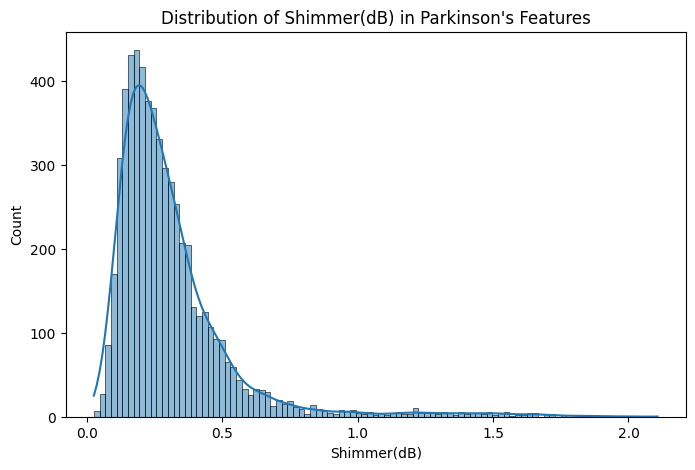

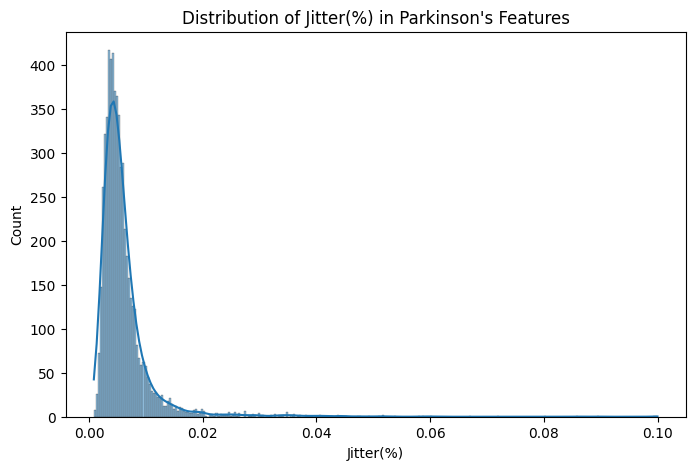


WDBC features distribution:


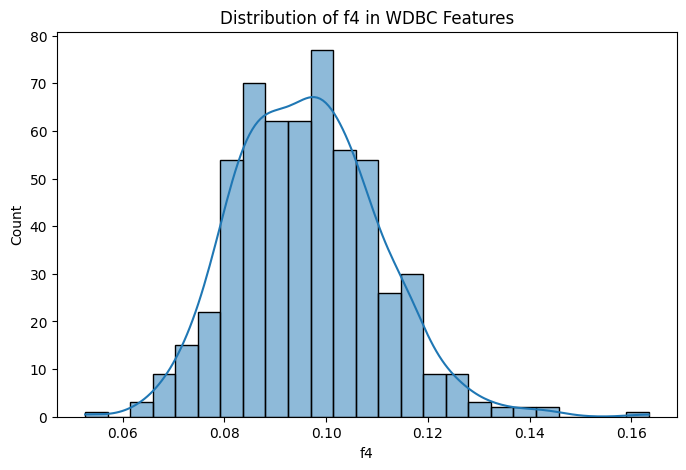

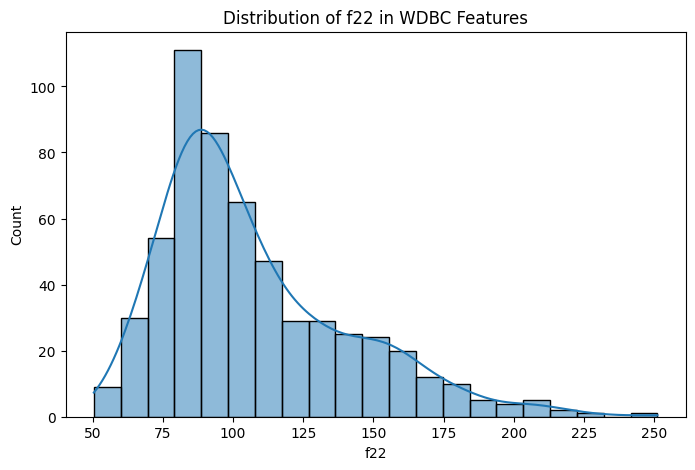

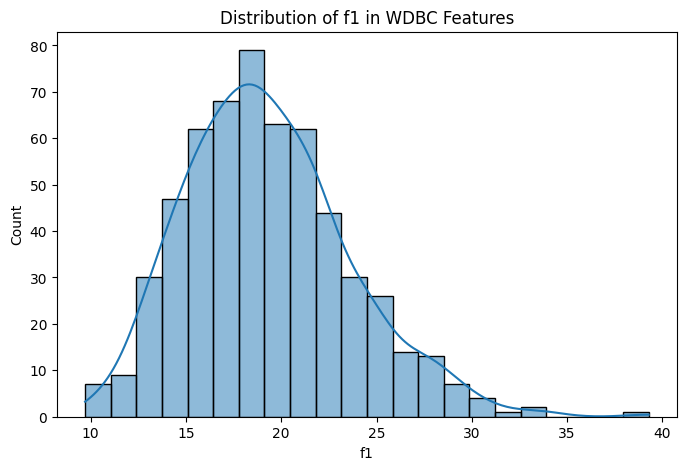

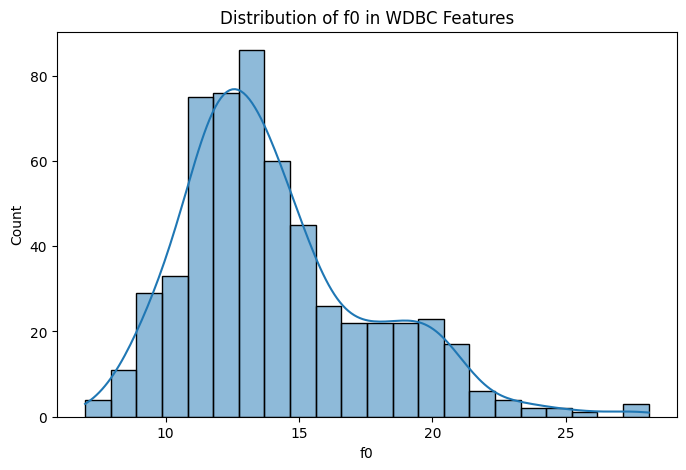

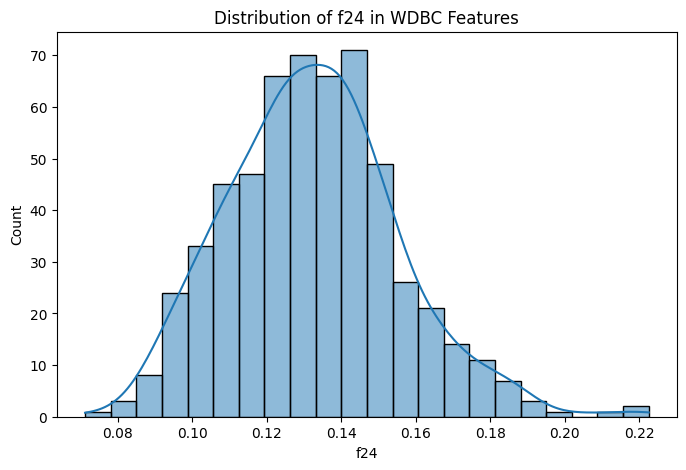

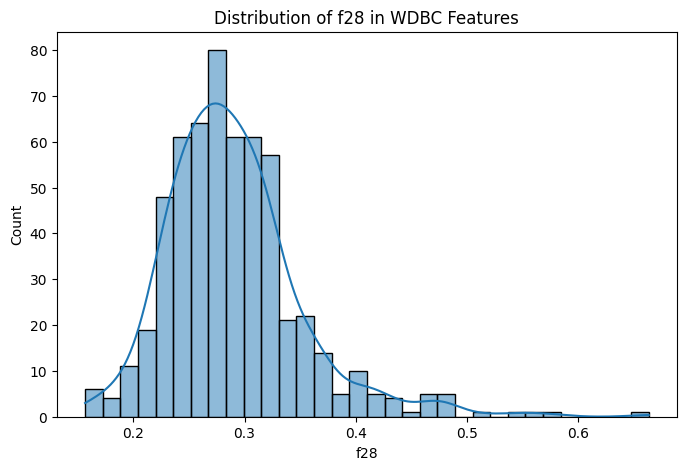

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# Visualize Parkinson's features
print("Parkinson’s features distribution:")
pk_columns_to_plot = ['sex', 'test_time', 'age']
pk_columns = list(pk_features.columns)
pk_random_columns = random.sample(pk_columns, 3)
pk_columns_to_plot.extend(pk_random_columns)
# remove duplicate after extend
pk_columns_to_plot = list(dict.fromkeys(pk_columns_to_plot))

for column in pk_columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(pk_features[column], kde=True)
    plt.title(f"Distribution of {column} in Parkinson's Features")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

# Visualize WDBC features
print("\nWDBC features distribution:")
wdbc_columns = list(wdbc_features.columns)
# Select 6 unique random columns
wdbc_columns_to_plot = random.sample(wdbc_columns, 6)
for column in wdbc_columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(wdbc_features[column], kde=True)
    plt.title(f"Distribution of {column} in WDBC Features")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

#**Task 2**

Functions will be used

###Basic Linear Regression

In [7]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        self.w = np.linalg.inv(x.T @ x)@x.T@y
        # self.w = np.linalg.lstsq(x, y)[0]          #return w for the least square difference
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0] # Calculate the number of samples in the test data
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = x@self.w                             #predict the y values
        return yh

###Full  batch GD Logistic Regression

In [8]:
logistic = lambda z: 1/(1+np.exp(-z))
#L2 loss for testing logistic
def L2_loss(Y,YH):
    return np.mean((Y - YH)**2)

#cross entropy cost
def cost_fn(w,#D
            X,#N*D
            y #N
            ):
  z = np.dot(X,w) # z is N*1
  J = np.mean(-y*np.log1p(np.exp(-z))+(1-y)*np.log1p(np.exp(z)))
  return J
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D


In [9]:
class LogisticRegression:
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e5, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g
            t += 1

        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self

    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

LogisticRegression.gradient = gradient             #initialize the gradient method of the LogisticRegression class with gradient function

###Mini-batch for both linear and logistic regression

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class MiniBatchOptimizer:
    def __init__(self, learning_rate=1e-2, max_iters=2000, epsilon=1e-8,
                 batch_size=32, constraint=1e-6, eval_every=20, seed=42,
                 regularization=None, reg_strength=0.0):
        self.learning_rate = learning_rate
        self.max_iters = int(max_iters)
        self.epsilon = epsilon
        self.batch_size = batch_size
        self.constraint = constraint
        self.eval_every = eval_every
        self.rng = np.random.default_rng(seed)
        self.regularization = regularization
        self.reg_strength = reg_strength


    def run(self, gradient_fn, cost_fn, X, y, w0):
        """
        gradient_fn(w, Xb, yb, regularization, reg_strength) -> grad
        cost_fn(w, X_full, y_full, regularization, reg_strength) -> scalar
        """
        N, D = X.shape
        w = np.array(w0, dtype=float, copy=True)
        grad = np.full_like(w, np.inf, dtype=float)
        t = 0

        cost_history = []
        prev_cost = None
        cost_diff = np.inf


        cost = cost_fn(w, X, y, self.regularization, self.reg_strength)
        cost_history.append(cost)
        prev_cost = cost

        while (np.linalg.norm(grad) > self.epsilon and
               t < self.max_iters and
               cost_diff > self.constraint):


            idx = self.rng.choice(N, size=min(self.batch_size, N), replace=False)
            Xb = X[idx, :]
            yb = y[idx] if y.ndim == 1 else y[idx, :]


            grad = gradient_fn(w, Xb, yb, self.regularization, self.reg_strength)
            w -= self.learning_rate * grad
            t += 1


            if t % self.eval_every == 0 or t == self.max_iters:
                cost = cost_fn(w, X, y, self.regularization, self.reg_strength)
                cost_history.append(cost)
                cost_diff = abs(cost - prev_cost)
                prev_cost = cost


        # plt.plot(cost_history)
        # plt.xlabel('Evaluations'); plt.ylabel('Cost'); plt.title('Mini-batch Training Curve')
        # plt.show()

        return w, cost_history

In [11]:
def linear_cost(w, X, y, regularization=None, reg_strength=0.0):
    err = X @ w - y
    return np.mean(err**2)

def linear_gradient(w, Xb, yb, regularization=None, reg_strength=0.0):
    N = Xb.shape[0]
    err = Xb @ w - yb
    return (Xb.T @ err) / N

class LinearRegressionOptimizer:
    def __init__(self, add_bias=True, learning_rate=1e-2, epsilon=1e-8,
                 max_iters=2000, batch_size=32, constraint=1e-6, eval_every=20):
        self.add_bias = add_bias
        self.opt = MiniBatchOptimizer(learning_rate, max_iters, epsilon,
                                      batch_size, constraint, eval_every)

    def fit(self, X, y, use_closed_form=False):
        X = np.asarray(X); y = np.asarray(y)
        if X.ndim == 1: X = X[:, None]
        if self.add_bias:
            X = np.column_stack([X, np.ones(X.shape[0])])
        D = X.shape[1]

        if use_closed_form:
            self.w = np.linalg.pinv(X.T @ X) @ X.T @ y
            self.history_ = []
            return self

        w0 = np.zeros(D)
        self.w, self.history_ = self.opt.run(linear_gradient, linear_cost, X, y, w0)
        return self

    def predict(self, X):
        X = np.asarray(X)
        if X.ndim == 1: X = X[:, None]
        if self.add_bias:
            X = np.column_stack([X, np.ones(X.shape[0])])
        return X @ self.w

    def loss(self, X, y):
        yhat = self.predict(X)
        return np.mean((yhat - y)**2)

In [12]:
def sigmoid(z):
    z = np.asarray(z)
    out = np.empty_like(z, dtype=float)
    pos = z >= 0
    out[pos] = 1.0/(1.0 + np.exp(-z[pos]))
    ez = np.exp(z[~pos]); out[~pos] = ez/(1.0 + ez)
    return out

def softplus(z):
    z = np.asarray(z)
    return np.where(z > 0, z + np.log1p(np.exp(-z)), np.log1p(np.exp(z)))

def logistic_cost(w, X, y, regularization=None, reg_strength=0.0):
    z = X @ w
    return np.mean(softplus(z) - y*z)

def logistic_gradient(w, Xb, yb, regularization=None, reg_strength=0.0):
    N = Xb.shape[0]
    p = sigmoid(Xb @ w)
    return (Xb.T @ (p - yb)) / N

class LogisticRegressionOptimizer:
    def __init__(self, add_bias=True, learning_rate=5e-2, epsilon=1e-8,
                 max_iters=5000, batch_size=64, constraint=1e-6, eval_every=20):
        self.add_bias = add_bias
        self.opt = MiniBatchOptimizer(learning_rate, max_iters, epsilon,
                                      batch_size, constraint, eval_every)

    def fit(self, X, y):
        X = np.asarray(X); y = np.asarray(y).astype(float)  # y ∈ {0,1}
        if X.ndim == 1: X = X[:, None]
        if self.add_bias:
            X = np.column_stack([X, np.ones(X.shape[0])])
        D = X.shape[1]
        w0 = np.zeros(D)
        self.w, self.history_ = self.opt.run(logistic_gradient, logistic_cost, X, y, w0)
        return self

    def predict_proba(self, X):
        X = np.asarray(X)
        if X.ndim == 1: X = X[:, None]
        if self.add_bias:
            X = np.column_stack([X, np.ones(X.shape[0])])
        return sigmoid(X @ self.w)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    def loss(self, X, y):
        X = np.asarray(X); y = np.asarray(y).astype(float)
        if X.ndim == 1: X = X[:, None]
        if self.add_bias:
            X = np.column_stack([X, np.ones(X.shape[0])])
        return logistic_cost(self.w, X, y)

#**Task 3**

### 1. Performance of linear regression and fully batched logistic regression

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the Parkinson's data into training and testing sets
X_train_pk, X_test_pk, y_train_pk, y_test_pk = train_test_split(pk_features_scaled, pk_target, test_size=0.2, random_state=42)

# Instantiate and train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_pk, y_train_pk)

# Make predictions on the training and test sets
y_pred_train_pk = linear_regression_model.predict(X_train_pk)
y_pred_test_pk = linear_regression_model.predict(X_test_pk)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train_pk, y_pred_train_pk)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_pk, y_pred_train_pk)

print(f"Linear Regression Model Performance on Parkinson's Dataset (Training Set):")
print(f"Mean Squared Error (MSE): {mse_train:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R-squared (R2): {r2_train:.4f}")

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test_pk, y_pred_test_pk)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_pk, y_pred_test_pk)

print(f"\nLinear Regression Model Performance on Parkinson's Dataset (Test Set):")
print(f"Mean Squared Error (MSE): {mse_test:.4f}")
print(f"Root Squared Error (RMSE): {rmse_test:.4f}")
print(f"R-squared (R2): {r2_test:.4f}")

Linear Regression Model Performance on Parkinson's Dataset (Training Set):
Mean Squared Error (MSE): 6.3164
Root Mean Squared Error (RMSE): 2.5132
R-squared (R2): 0.9052

Linear Regression Model Performance on Parkinson's Dataset (Test Set):
Mean Squared Error (MSE): 5.9958
Root Squared Error (RMSE): 2.4486
R-squared (R2): 0.9061


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the WDBC data into training and testing sets
X_train_wdbc, X_test_wdbc, y_train_wdbc, y_test_wdbc = train_test_split(wdbc_features_scaled, wdbc_target, test_size=0.2, random_state=42)

# Instantiate and train the Logistic Regression model
logistic_regression_model = LogisticRegression(learning_rate=0.01, max_iters=1000)
logistic_regression_model.fit(X_train_wdbc, y_train_wdbc)

# Make predictions on the training and test sets
y_pred_train_wdbc = logistic_regression_model.predict(X_train_wdbc)
y_pred_test_wdbc = logistic_regression_model.predict(X_test_wdbc)


# Evaluate the model on the training set
accuracy_train = accuracy_score(y_train_wdbc, y_pred_train_wdbc > 0.5)
print(f"Accuracy of Logistic Regression model on WDBC dataset (Training Set): {accuracy_train:.4f}")


# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test_wdbc, y_pred_test_wdbc > 0.5)
print(f"Accuracy of Logistic Regression model on WDBC dataset (Test Set): {accuracy_test:.4f}")

Accuracy of Logistic Regression model on WDBC dataset (Training Set): 0.9824
Accuracy of Logistic Regression model on WDBC dataset (Test Set): 0.9912


###2. Report weights of features

In [15]:
# Display weights for Linear Regression model (Parkinson's)
print("Linear Regression Model Weights (Parkinson's Dataset):")
# Assuming the last column is the bias term if add_bias was True
feature_names_pk = pk_features.columns.tolist()
weights_pk = linear_regression_model.w

if linear_regression_model.add_bias:
    for feature, weight in zip(feature_names_pk, weights_pk[:-1]):
        print(f"{feature}: {weight:.4f}")
    print(f"Bias (intercept): {weights_pk[-1]:.4f}")
else:
    for feature, weight in zip(feature_names_pk, weights_pk):
        print(f"{feature}: {weight:.4f}")


print("\nLogistic Regression Model Weights (WDBC Dataset):")
# Assuming the last column is the bias term if add_bias was True
feature_names_wdbc = wdbc_features.columns.tolist()
weights_wdbc = logistic_regression_model.w

if logistic_regression_model.add_bias:
    for feature, weight in zip(feature_names_wdbc, weights_wdbc[:-1]):
        print(f"{feature}: {weight:.4f}")
    print(f"Bias (intercept): {weights_wdbc[-1]:.4f}")
else:
     for feature, weight in zip(feature_names_wdbc, weights_wdbc):
        print(f"{feature}: {weight:.4f}")

Linear Regression Model Weights (Parkinson's Dataset):
age: -0.2146
sex: 0.4164
test_time: -0.0268
total_UPDRS: 7.7321
Jitter(%): 1.1383
Jitter(Abs): -0.6639
Jitter:RAP: -24.4180
Jitter:PPQ5: -0.0352
Jitter:DDP: 23.7253
Shimmer: 0.5914
Shimmer(dB): 0.0090
Shimmer:APQ3: -103.8326
Shimmer:APQ5: -1.3022
Shimmer:APQ11: 0.8483
Shimmer:DDA: 103.8723
NHR: -0.0130
HNR: 0.0736
RPDE: -0.2308
DFA: -0.0823
PPE: 0.4552
Bias (intercept): 21.2919

Logistic Regression Model Weights (WDBC Dataset):
f0: 0.3752
f1: 0.3601
f2: 0.3711
f3: 0.3711
f4: 0.1559
f5: 0.1328
f6: 0.2893
f7: 0.3914
f8: 0.0934
f9: -0.1497
f10: 0.3293
f11: 0.0135
f12: 0.2753
f13: 0.2999
f14: 0.0031
f15: -0.1136
f16: -0.0931
f17: 0.0478
f18: -0.0757
f19: -0.1962
f20: 0.4397
f21: 0.4349
f22: 0.4187
f23: 0.4133
f24: 0.3078
f25: 0.2095
f26: 0.2911
f27: 0.3980
f28: 0.3089
f29: 0.0938
Bias (intercept): -0.3265


###3. Sample growing subsets of training data

- 1. Linear Regression Model

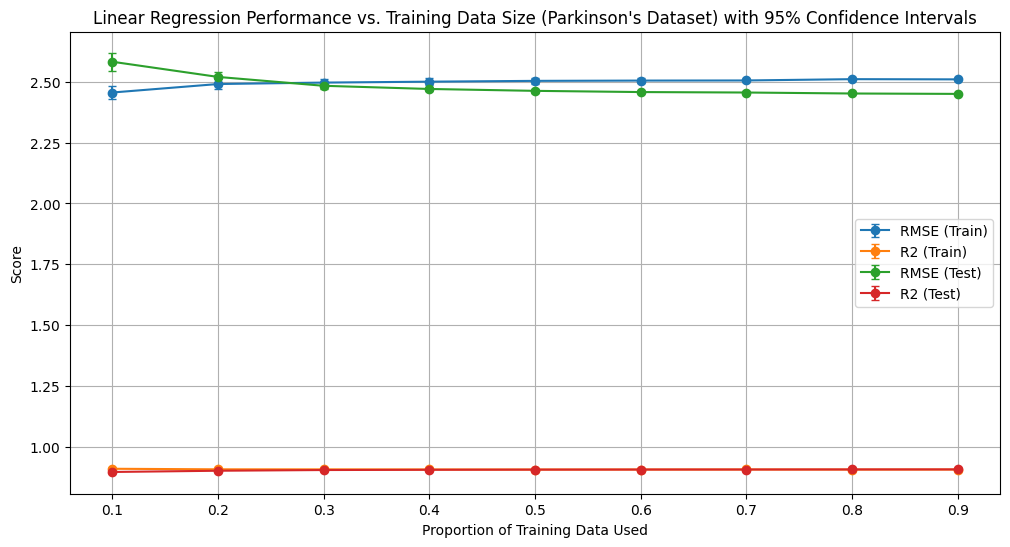

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Split the Parkinson's data into training and testing sets (if not already split)
# Assuming pk_features_scaled and pk_target are already defined and scaled
X_train_pk, X_test_pk, y_train_pk, y_test_pk = train_test_split(pk_features_scaled, pk_target, test_size=0.2, random_state=42)

# Define the proportions of training data to use
proportions = np.linspace(0.1, 0.9, 9)  # From 10% to 90%
n_runs = 30  # Number of runs to average over for confidence intervals

# Lists to store performance metrics
rmse_train_scores_runs = []
r2_train_scores_runs = []
rmse_test_scores_runs = []
r2_test_scores_runs = []

for prop in proportions:
    rmse_train_run = []
    r2_train_run = []
    rmse_test_run = []
    r2_test_run = []

    for run in range(n_runs):
        # Sample a subset of the training data with a different random state for each run
        X_subset, _, y_subset, _ = train_test_split(X_train_pk, y_train_pk, train_size=prop, random_state=42 + run) # Vary random state

        # Instantiate and train the Linear Regression model on the subset
        linear_regression_model = LinearRegression()
        linear_regression_model.fit(X_subset, y_subset)

        # Make predictions and evaluate on the training subset
        y_pred_train = linear_regression_model.predict(X_subset)
        mse_train = mean_squared_error(y_subset, y_pred_train)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y_subset, y_pred_train)
        rmse_train_run.append(rmse_train)
        r2_train_run.append(r2_train)


        # Make predictions on the test set
        y_pred_test = linear_regression_model.predict(X_test_pk)

        # Evaluate the model on the test set
        mse_test = mean_squared_error(y_test_pk, y_pred_test)
        rmse_test = np.sqrt(mse_test)
        r2_test = r2_score(y_test_pk, y_pred_test)
        rmse_test_run.append(rmse_test)
        r2_test_run.append(r2_test)


    # Calculate mean and confidence interval (95%) for metrics across runs
    rmse_train_mean = np.mean(rmse_train_run)
    rmse_train_ci = stats.t.interval(0.95, len(rmse_train_run)-1, loc=rmse_train_mean, scale=stats.sem(rmse_train_run))
    r2_train_mean = np.mean(r2_train_run)
    r2_train_ci = stats.t.interval(0.95, len(r2_train_run)-1, loc=r2_train_mean, scale=stats.sem(r2_train_run))
    rmse_test_mean = np.mean(rmse_test_run)
    rmse_test_ci = stats.t.interval(0.95, len(rmse_test_run)-1, loc=rmse_test_mean, scale=stats.sem(rmse_test_run))
    r2_test_mean = np.mean(r2_test_run)
    r2_test_ci = stats.t.interval(0.95, len(r2_test_run)-1, loc=r2_test_mean, scale=stats.sem(r2_test_run))

    rmse_train_scores_runs.append((rmse_train_mean, rmse_train_ci))
    r2_train_scores_runs.append((r2_train_mean, r2_train_ci))
    rmse_test_scores_runs.append((rmse_test_mean, rmse_test_ci))
    r2_test_scores_runs.append((r2_test_mean, r2_test_ci))


# Separate means and confidence intervals for plotting
rmse_train_means = [x[0] for x in rmse_train_scores_runs]
rmse_train_cis = np.array([x[1] for x in rmse_train_scores_runs])
r2_train_means = [x[0] for x in r2_train_scores_runs]
r2_train_cis = np.array([x[1] for x in r2_train_scores_runs])
rmse_test_means = [x[0] for x in rmse_test_scores_runs]
rmse_test_cis = np.array([x[1] for x in rmse_test_scores_runs])
r2_test_means = [x[0] for x in r2_test_scores_runs]
r2_test_cis = np.array([x[1] for x in r2_test_scores_runs])


# Plot the performance metrics with confidence intervals
plt.figure(figsize=(12, 6))

plt.errorbar(proportions, rmse_train_means, yerr=[rmse_train_means - rmse_train_cis[:, 0], rmse_train_cis[:, 1] - rmse_train_means], marker='o', label='RMSE (Train)', capsize=3)
plt.errorbar(proportions, r2_train_means, yerr=[r2_train_means - r2_train_cis[:, 0], r2_train_cis[:, 1] - r2_train_means], marker='o', label='R2 (Train)', capsize=3)
plt.errorbar(proportions, rmse_test_means, yerr=[rmse_test_means - rmse_test_cis[:, 0], rmse_test_cis[:, 1] - rmse_test_means], marker='o', label='RMSE (Test)', capsize=3)
plt.errorbar(proportions, r2_test_means, yerr=[r2_test_means - r2_test_cis[:, 0], r2_test_cis[:, 1] - r2_test_means], marker='o', label='R2 (Test)', capsize=3)


plt.xlabel("Proportion of Training Data Used")
plt.ylabel("Score")
plt.title("Linear Regression Performance vs. Training Data Size (Parkinson's Dataset) with 95% Confidence Intervals")
plt.legend()
plt.grid(True)
plt.show()

- 2. Logistic Regression Model

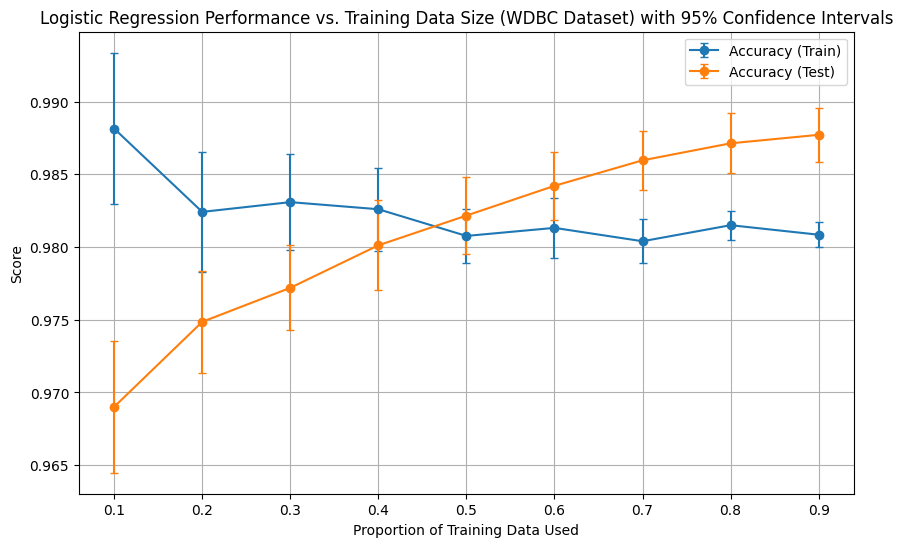

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Split the WDBC data into training and testing sets (if not already split)
# Assuming wdbc_features_scaled and wdbc_target are already defined and scaled
X_train_wdbc, X_test_wdbc, y_train_wdbc, y_test_wdbc = train_test_split(wdbc_features_scaled, wdbc_target, test_size=0.2, random_state=42)

# Define the proportions of training data to use
proportions = np.linspace(0.1, 0.9, 9)  # From 10% to 90%
n_runs = 30  # Number of runs to average over for confidence intervals

# Lists to store performance metrics
accuracy_train_scores_runs = []
accuracy_test_scores_runs = []

for prop in proportions:
    accuracy_train_run = []
    accuracy_test_run = []

    for run in range(n_runs):
        # Sample a subset of the training data with a different random state for each run
        if prop == 1.0:
            X_subset, y_subset = X_train_wdbc, y_train_wdbc
        else:
            X_subset, _, y_subset, _ = train_test_split(X_train_wdbc, y_train_wdbc, train_size=prop, random_state=42 + run) # Vary random state

        # Instantiate and train the Logistic Regression model using gradient descent
        logistic_regression_model = LogisticRegression(learning_rate=0.01, max_iters=1000)
        logistic_regression_model.fit(X_subset, y_subset)

        # Make predictions and evaluate on the training subset
        y_pred_train = logistic_regression_model.predict(X_subset)
        accuracy_train = accuracy_score(y_subset, y_pred_train > 0.5)
        accuracy_train_run.append(accuracy_train)


        # Make predictions on the test set
        y_pred_test = logistic_regression_model.predict(X_test_wdbc)

        # Evaluate the model on the test set
        accuracy_test = accuracy_score(y_test_wdbc, y_pred_test > 0.5)
        accuracy_test_run.append(accuracy_test)


    # Calculate mean and confidence interval (95%) for metrics across runs
    accuracy_train_mean = np.mean(accuracy_train_run)
    accuracy_train_ci = stats.t.interval(0.95, len(accuracy_train_run)-1, loc=accuracy_train_mean, scale=stats.sem(accuracy_train_run))
    accuracy_test_mean = np.mean(accuracy_test_run)
    accuracy_test_ci = stats.t.interval(0.95, len(accuracy_test_run)-1, loc=accuracy_test_mean, scale=stats.sem(accuracy_test_run))

    accuracy_train_scores_runs.append((accuracy_train_mean, accuracy_train_ci))
    accuracy_test_scores_runs.append((accuracy_test_mean, accuracy_test_ci))


# Separate means and confidence intervals for plotting
accuracy_train_means = [x[0] for x in accuracy_train_scores_runs]
accuracy_train_cis = np.array([x[1] for x in accuracy_train_scores_runs])
accuracy_test_means = [x[0] for x in accuracy_test_scores_runs]
accuracy_test_cis = np.array([x[1] for x in accuracy_test_scores_runs])


# Plot the performance metrics with confidence intervals
plt.figure(figsize=(10, 6))

plt.errorbar(proportions, accuracy_train_means, yerr=[accuracy_train_means - accuracy_train_cis[:, 0], accuracy_train_cis[:, 1] - accuracy_train_means], marker='o', label='Accuracy (Train)', capsize=3)
plt.errorbar(proportions, accuracy_test_means, yerr=[accuracy_test_means - accuracy_test_cis[:, 0], accuracy_test_cis[:, 1] - accuracy_test_means], marker='o', label='Accuracy (Test)', capsize=3)


plt.xlabel("Proportion of Training Data Used")
plt.ylabel("Score")
plt.title("Logistic Regression Performance vs. Training Data Size (WDBC Dataset) with 95% Confidence Intervals")
plt.legend()
plt.grid(True)
plt.show()

###4. Compare performance for growing batch size

--- Linear Regression with different batch sizes (Parkinson's Dataset) ---

Training Linear Regression with batch size: 8
  MSE: 6.0933
  RMSE: 2.4685
  R2: 0.9045

Training Linear Regression with batch size: 16
  MSE: 6.1061
  RMSE: 2.4711
  R2: 0.9043

Training Linear Regression with batch size: 32
  MSE: 6.0484
  RMSE: 2.4593
  R2: 0.9052

Training Linear Regression with batch size: 64
  MSE: 6.0499
  RMSE: 2.4597
  R2: 0.9052

Training Linear Regression with batch size: 128
  MSE: 6.0385
  RMSE: 2.4573
  R2: 0.9054

Training Linear Regression with batch size: 4700
  MSE: 6.0395
  RMSE: 2.4575
  R2: 0.9054


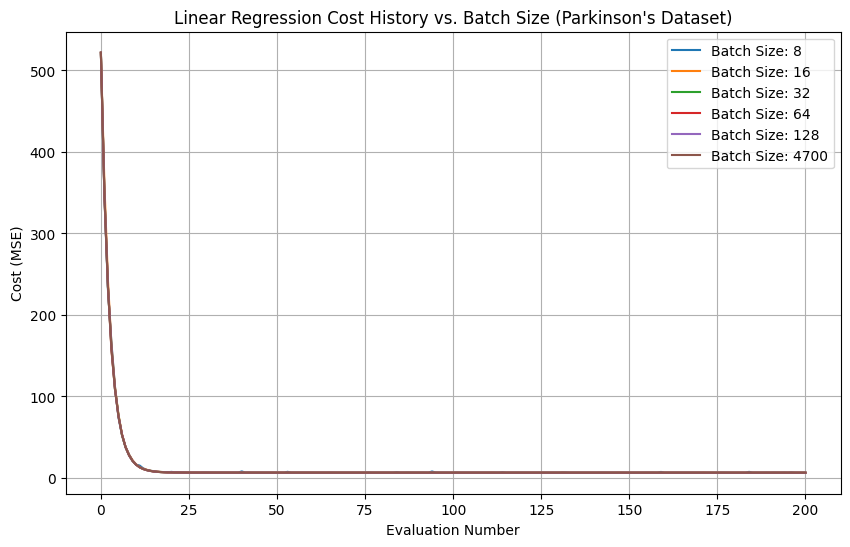


--- Logistic Regression with different batch sizes (WDBC Dataset) ---

Training Logistic Regression with batch size: 8
  Accuracy: 0.9825

Training Logistic Regression with batch size: 16
  Accuracy: 0.9912

Training Logistic Regression with batch size: 32
  Accuracy: 0.9825

Training Logistic Regression with batch size: 64
  Accuracy: 0.9825

Training Logistic Regression with batch size: 128
  Accuracy: 0.9825

Training Logistic Regression with batch size: 455
  Accuracy: 0.9825


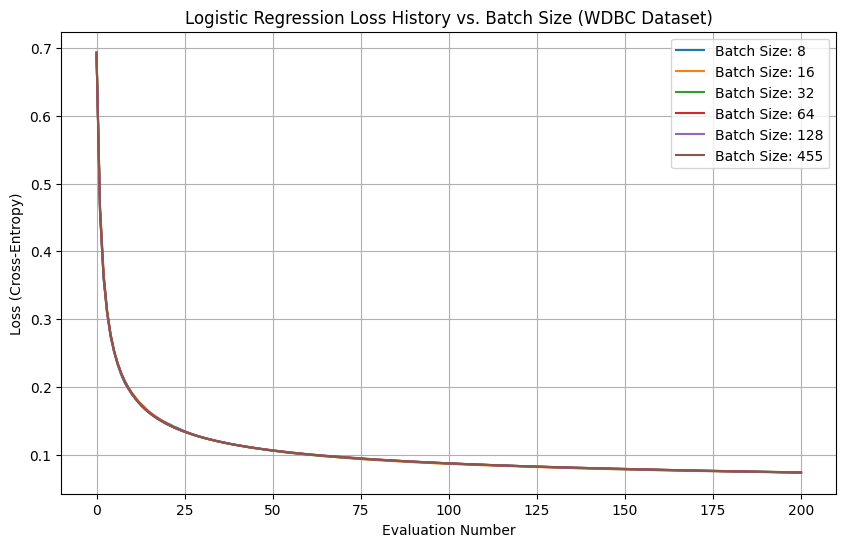

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define batch sizes to test, including the full batch size
# Full batch size is the number of samples in the training data
X_train_pk, X_test_pk, y_train_pk, y_test_pk = train_test_split(pk_features_scaled, pk_target, test_size=0.2, random_state=42)
X_train_wdbc, X_test_wdbc, y_train_wdbc, y_test_wdbc = train_test_split(wdbc_features_scaled, wdbc_target, test_size=0.2, random_state=42)

batch_sizes = [8, 16, 32, 64, 128, len(X_train_pk)] # Add full batch size for Parkinson's
batch_sizes_wdbc = [8, 16, 32, 64, 128, len(X_train_wdbc)] # Add full batch size for WDBC


# --- Linear Regression with different batch sizes (Parkinson's Dataset) ---
print("--- Linear Regression with different batch sizes (Parkinson's Dataset) ---")
rmse_scores_linear = {}
r2_scores_linear = {}
linear_histories = {}


for bs in batch_sizes:
    print(f"\nTraining Linear Regression with batch size: {bs}")
    # Using a fixed learning rate for comparison, e.g., 0.01
    lin_mb = LinearRegressionOptimizer(learning_rate=1e-2, max_iters=4000,
                                       batch_size=bs, eval_every=20, constraint=1e-7)
    lin_mb.fit(X_train_pk, y_train_pk)
    yhat_mb = lin_mb.predict(X_test_pk)

    mse_mb = mean_squared_error(y_test_pk, yhat_mb)
    rmse_mb = np.sqrt(mse_mb)
    r2_mb = r2_score(y_test_pk, yhat_mb)

    rmse_scores_linear[bs] = rmse_mb
    r2_scores_linear[bs] = r2_mb
    linear_histories[bs] = lin_mb.history_

    print(f"  MSE: {mse_mb:.4f}")
    print(f"  RMSE: {rmse_mb:.4f}")
    print(f"  R2: {r2_mb:.4f}")

# Plotting for Linear Regression batch sizes
plt.figure(figsize=(10, 6))
for bs, history in linear_histories.items():
    plt.plot(history, label=f'Batch Size: {bs}')
plt.xlabel("Evaluation Number")
plt.ylabel("Cost (MSE)")
plt.title("Linear Regression Cost History vs. Batch Size (Parkinson's Dataset)")
plt.legend()
plt.grid(True)
plt.show()


# --- Logistic Regression with different batch sizes (WDBC Dataset) ---
print("\n--- Logistic Regression with different batch sizes (WDBC Dataset) ---")
accuracy_scores_logistic = {}
logistic_histories = {}


for bs in batch_sizes_wdbc:
    print(f"\nTraining Logistic Regression with batch size: {bs}")
    # Using a fixed learning rate for comparison, e.g., 0.01
    logr_mb = LogisticRegressionOptimizer(learning_rate=1e-2, max_iters=4000,
                                        batch_size=bs, eval_every=20, constraint=1e-7)
    logr_mb.fit(X_train_wdbc, y_train_wdbc)
    pred_mb = logr_mb.predict(X_test_wdbc)
    acc_mb = (pred_mb == y_test_wdbc).mean()

    accuracy_scores_logistic[bs] = acc_mb
    logistic_histories[bs] = logr_mb.history_


    print(f"  Accuracy: {acc_mb:.4f}")


# Plotting for Logistic Regression batch sizes
plt.figure(figsize=(10, 6))
for bs, history in logistic_histories.items():
    plt.plot(history, label=f'Batch Size: {bs}')
plt.xlabel("Evaluation Number")
plt.ylabel("Loss (Cross-Entropy)")
plt.title("Logistic Regression Loss History vs. Batch Size (WDBC Dataset)")
plt.legend()
plt.grid(True)
plt.show()

###5. performance of both linear and logistic regression with at different learning rates

--- Linear Regression with different learning rates (Parkinson's Dataset) ---

Training Linear Regression with learning rate: 0.001
  MSE: 6.4871
  RMSE: 2.5470
  R2: 0.8984

Training Linear Regression with learning rate: 0.01
  MSE: 6.0499
  RMSE: 2.4597
  R2: 0.9052

Training Linear Regression with learning rate: 0.05
  MSE: 6.0658
  RMSE: 2.4629
  R2: 0.9050

Training Linear Regression with learning rate: 0.1
  MSE: 6.1543
  RMSE: 2.4808
  R2: 0.9036


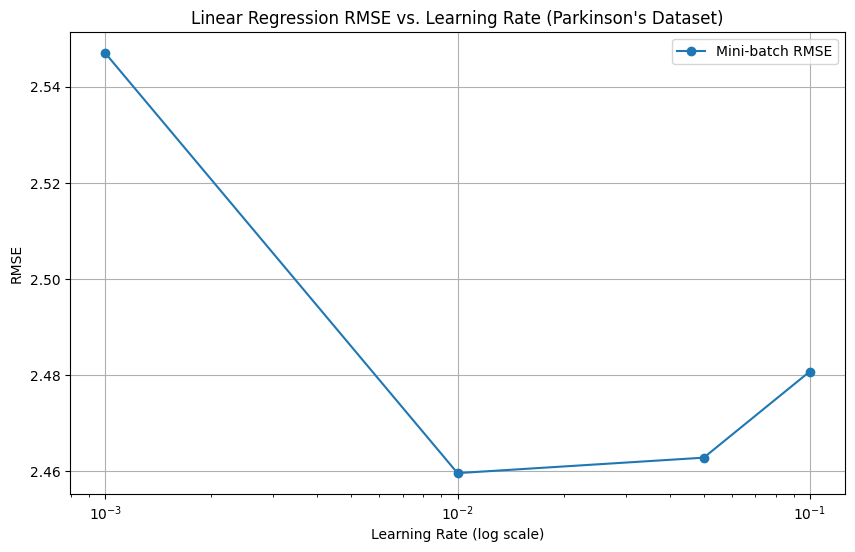

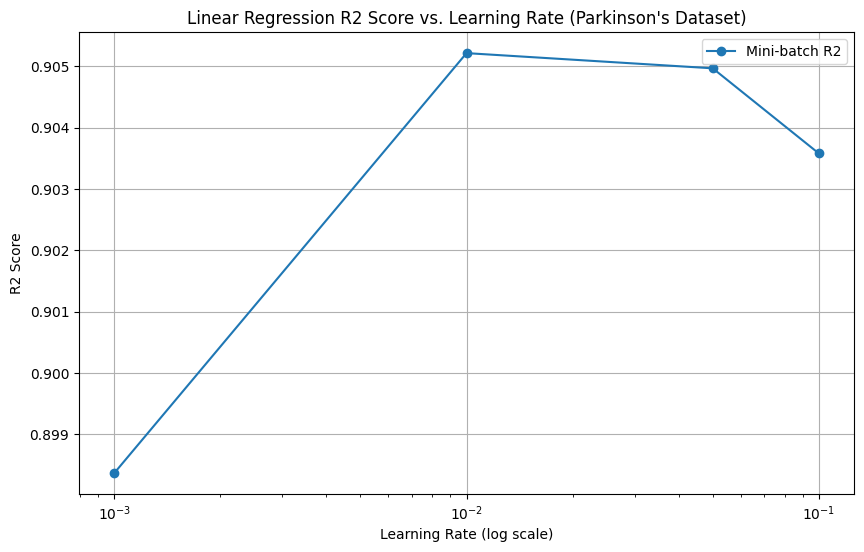


--- Logistic Regression with different learning rates (WDBC Dataset) ---

Training Logistic Regression with learning rate: 0.001
  Accuracy: 0.9825

Training Logistic Regression with learning rate: 0.01
  Accuracy: 0.9825

Training Logistic Regression with learning rate: 0.05
  Accuracy: 0.9912

Training Logistic Regression with learning rate: 0.1
  Accuracy: 0.9825


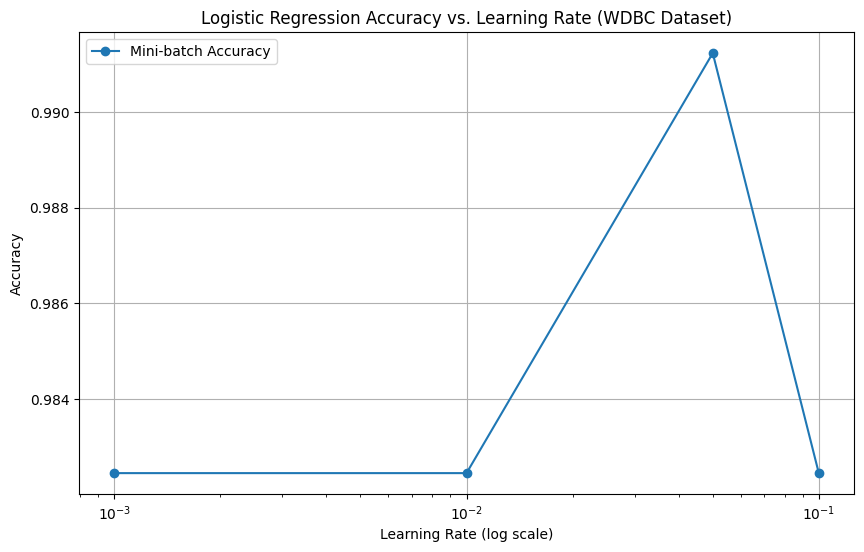

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define learning rates to test
learning_rates = [1e-3, 1e-2, 5e-2, 1e-1]

# --- Linear Regression with different learning rates (Parkinson's Dataset) ---
print("--- Linear Regression with different learning rates (Parkinson's Dataset) ---")
rmse_scores_linear_lr = {}
r2_scores_linear_lr = {}

for lr in learning_rates:
    print(f"\nTraining Linear Regression with learning rate: {lr}")
    # Using a fixed batch size for comparison, e.g., 64
    lin_mb_lr = LinearRegressionOptimizer(learning_rate=lr, max_iters=4000,
                                       batch_size=64, eval_every=20, constraint=1e-7)
    lin_mb_lr.fit(X_train_pk, y_train_pk)
    yhat_mb_lr = lin_mb_lr.predict(X_test_pk)

    mse_mb_lr = mean_squared_error(y_test_pk, yhat_mb_lr)
    rmse_mb_lr = np.sqrt(mse_mb_lr)
    r2_mb_lr = r2_score(y_test_pk, yhat_mb_lr)

    rmse_scores_linear_lr[lr] = rmse_mb_lr
    r2_scores_linear_lr[lr] = r2_mb_lr

    print(f"  MSE: {mse_mb_lr:.4f}")
    print(f"  RMSE: {rmse_mb_lr:.4f}")
    print(f"  R2: {r2_mb_lr:.4f}")


# Plotting for Linear Regression learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, list(rmse_scores_linear_lr.values()), marker='o', label='Mini-batch RMSE')
plt.xscale('log')
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("RMSE")
plt.title("Linear Regression RMSE vs. Learning Rate (Parkinson's Dataset)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(learning_rates, list(r2_scores_linear_lr.values()), marker='o', label='Mini-batch R2')
plt.xscale('log')
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("R2 Score")
plt.title("Linear Regression R2 Score vs. Learning Rate (Parkinson's Dataset)")
plt.legend()
plt.grid(True)
plt.show()


# --- Logistic Regression with different learning rates (WDBC Dataset) ---
print("\n--- Logistic Regression with different learning rates (WDBC Dataset) ---")
accuracy_scores_logistic_lr = {}

for lr in learning_rates:
    print(f"\nTraining Logistic Regression with learning rate: {lr}")
    # Using a fixed batch size for comparison, e.g., 64
    logr_mb_lr = LogisticRegressionOptimizer(learning_rate=lr, max_iters=6000,
                                        batch_size=64, eval_every=20, constraint=1e-7)
    logr_mb_lr.fit(X_train_wdbc, y_train_wdbc)
    pred_mb_lr = logr_mb_lr.predict(X_test_wdbc)
    acc_mb_lr = (pred_mb_lr == y_test_wdbc).mean()

    accuracy_scores_logistic_lr[lr] = acc_mb_lr

    print(f"  Accuracy: {acc_mb_lr:.4f}")

# Plotting for Logistic Regression learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, list(accuracy_scores_logistic_lr.values()), marker='o', label='Mini-batch Accuracy')
plt.xscale('log')
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy vs. Learning Rate (WDBC Dataset)")
plt.legend()
plt.grid(True)
plt.show()

###6. Compare analytical linear regression solution with mini-batch stochastic gradient solution

Mini-batch Linear Regression Model Performance on Parkinson's Dataset:
Mean Squared Error (MSE): 6.0658
Root Mean Squared Error (RMSE): 2.4629
R-squared (R2): 0.9050

Mini-batch Linear Regression Model Weights (Parkinson's Dataset):
age: -0.2069
sex: 0.4051
test_time: -0.0372
total_UPDRS: 7.6913
Jitter(%): 0.9170
Jitter(Abs): -0.6785
Jitter:RAP: -0.2916
Jitter:PPQ5: -0.0832
Jitter:DDP: -0.2859
Shimmer: 0.4023
Shimmer(dB): 0.0931
Shimmer:APQ3: 0.0232
Shimmer:APQ5: -1.2463
Shimmer:APQ11: 0.8650
Shimmer:DDA: 0.0237
NHR: -0.0424
HNR: 0.0117
RPDE: -0.1490
DFA: -0.1748
PPE: 0.5547
Bias (intercept): 21.2245


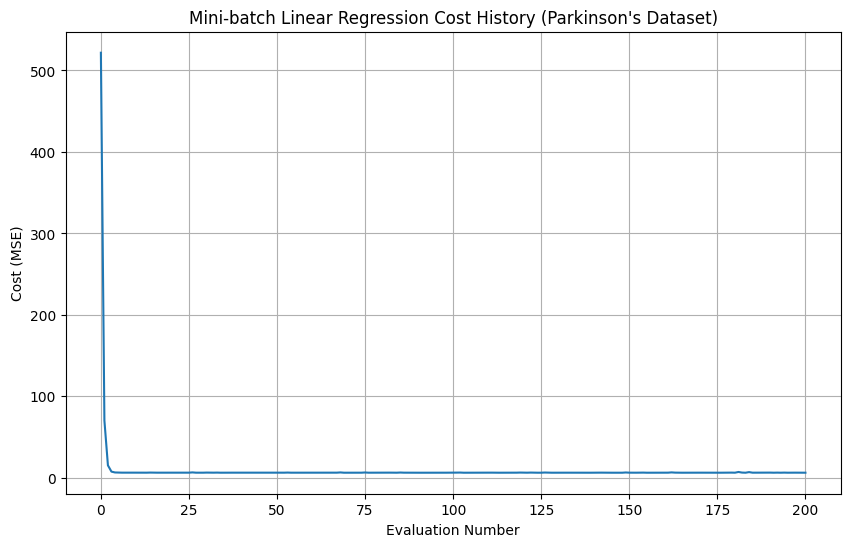

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the Parkinson's data into training and testing sets
X_train_pk, X_test_pk, y_train_pk, y_test_pk = train_test_split(pk_features_scaled, pk_target, test_size=0.2, random_state=42)

# Use the LinearRegressionOptimizer with mini-batch on Parkinson's data
lin_mb = LinearRegressionOptimizer(learning_rate=5e-2, max_iters=4000,
                                batch_size=64, eval_every=20, constraint=1e-7)
lin_mb.fit(X_train_pk, y_train_pk)
yhat_mb = lin_mb.predict(X_test_pk)

# Evaluate the mini-batch linear regression model
mse_mb = mean_squared_error(y_test_pk, yhat_mb)
rmse_mb = np.sqrt(mse_mb)
r2_mb = r2_score(y_test_pk, yhat_mb)

print(f"Mini-batch Linear Regression Model Performance on Parkinson's Dataset:")
print(f"Mean Squared Error (MSE): {mse_mb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_mb:.4f}")
print(f"R-squared (R2): {r2_mb:.4f}")

# Display weights for Mini-batch Linear Regression model (Parkinson's)
print("\nMini-batch Linear Regression Model Weights (Parkinson's Dataset):")
feature_names_pk = pk_features.columns.tolist()
weights_pk_mb = lin_mb.w

if lin_mb.add_bias:
    for feature, weight in zip(feature_names_pk, weights_pk_mb[:-1]):
        print(f"{feature}: {weight:.4f}")
    print(f"Bias (intercept): {weights_pk_mb[-1]:.4f}")
else:
    for feature, weight in zip(feature_names_pk, weights_pk_mb):
        print(f"{feature}: {weight:.4f}")

# Plot the cost history
plt.figure(figsize=(10, 6))
plt.plot(lin_mb.history_)
plt.xlabel("Evaluation Number")
plt.ylabel("Cost (MSE)")
plt.title("Mini-batch Linear Regression Cost History (Parkinson's Dataset)")
plt.grid(True)
plt.show()

In [21]:
# Compare analytical linear regression solution with mini-batch stochastic gradient descent based linear regression solution

# Use the LinearRegressionOptimizer with mini-batch on Parkinson's data
# Already done in cell XMpia7puXPHF, reusing the results

# Evaluate the mini-batch linear regression model
print(f"Mini-batch Linear Regression Model Performance on Parkinson's Dataset:")
print(f"Mean Squared Error (MSE): {mse_mb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_mb:.4f}")
print(f"R-squared (R2): {r2_mb:.4f}")

# Display weights for Mini-batch Linear Regression model (Parkinson's)
print("\nMini-batch Linear Regression Model Weights (Parkinson's Dataset):")
feature_names_pk = pk_features.columns.tolist()
weights_pk_mb = lin_mb.w

if lin_mb.add_bias:
    for feature, weight in zip(feature_names_pk, weights_pk_mb[:-1]):
        print(f"{feature}: {weight:.4f}")
    print(f"Bias (intercept): {weights_pk_mb[-1]:.4f}")
else:
    for feature, weight in zip(feature_names_pk, weights_pk_mb):
        print(f"{feature}: {weight:.4f}")

# Use the original LinearRegression class for the closed form solution
linear_regression_model_cf = LinearRegression()
linear_regression_model_cf.fit(X_train_pk, y_train_pk)
yhat_cf = linear_regression_model_cf.predict(X_test_pk)


# Evaluate the analytical linear regression model
mse_cf = mean_squared_error(y_test_pk, yhat_cf)
rmse_cf = np.sqrt(mse_cf)
r2_cf = r2_score(y_test_pk, yhat_cf)

print(f"\nAnalytical Linear Regression Model Performance on Parkinson's Dataset:")
print(f"Mean Squared Error (MSE): {mse_cf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_cf:.4f}")
print(f"R-squared (R2): {r2_cf:.4f}")

# Display weights for Analytical Linear Regression model (Parkinson's)
print("\nAnalytical Linear Regression Model Weights (Parkinson's Dataset):")
weights_pk_cf = linear_regression_model_cf.w

if linear_regression_model_cf.add_bias:
    for feature, weight in zip(feature_names_pk, weights_pk_cf[:-1]):
        print(f"{feature}: {weight:.4f}")
    print(f"Bias (intercept): {weights_pk_cf[-1]:.4f}")
else:
    for feature, weight in zip(feature_names_pk, weights_pk_cf):
        print(f"{feature}: {weight:.4f}")


# Compare weights
print("\nComparison of Weights (Mini-batch vs. Analytical):")
if len(weights_pk_mb) == len(weights_pk_cf):
    if lin_mb.add_bias and linear_regression_model_cf.add_bias:
        for feature, weight_mb, weight_cf in zip(feature_names_pk, weights_pk_mb[:-1], weights_pk_cf[:-1]):
            print(f"{feature}: Mini-batch={weight_mb:.4f}, Analytical={weight_cf:.4f}")
        print(f"Bias: Mini-batch={weights_pk_mb[-1]:.4f}, Analytical={weights_pk_cf[-1]:.4f}")
    elif not lin_mb.add_bias and not linear_regression_model_cf.add_bias:
         for feature, weight_mb, weight_cf in zip(feature_names_pk, weights_pk_mb, weights_pk_cf):
            print(f"{feature}: Mini-batch={weight_mb:.4f}, Analytical={weight_cf:.4f}")
    else:
        print("Cannot compare weights directly due to different bias handling in models.")
else:
    print("Cannot compare weights directly due to different number of weights.")

Mini-batch Linear Regression Model Performance on Parkinson's Dataset:
Mean Squared Error (MSE): 6.0658
Root Mean Squared Error (RMSE): 2.4629
R-squared (R2): 0.9050

Mini-batch Linear Regression Model Weights (Parkinson's Dataset):
age: -0.2069
sex: 0.4051
test_time: -0.0372
total_UPDRS: 7.6913
Jitter(%): 0.9170
Jitter(Abs): -0.6785
Jitter:RAP: -0.2916
Jitter:PPQ5: -0.0832
Jitter:DDP: -0.2859
Shimmer: 0.4023
Shimmer(dB): 0.0931
Shimmer:APQ3: 0.0232
Shimmer:APQ5: -1.2463
Shimmer:APQ11: 0.8650
Shimmer:DDA: 0.0237
NHR: -0.0424
HNR: 0.0117
RPDE: -0.1490
DFA: -0.1748
PPE: 0.5547
Bias (intercept): 21.2245

Analytical Linear Regression Model Performance on Parkinson's Dataset:
Mean Squared Error (MSE): 5.9958
Root Mean Squared Error (RMSE): 2.4486
R-squared (R2): 0.9061

Analytical Linear Regression Model Weights (Parkinson's Dataset):
age: -0.2146
sex: 0.4164
test_time: -0.0268
total_UPDRS: 7.7321
Jitter(%): 1.1383
Jitter(Abs): -0.6639
Jitter:RAP: -24.4180
Jitter:PPQ5: -0.0352
Jitter:DDP: 2

#**Experiment**

###Add Momentum

In [22]:
class AdamOptimizer:
    def __init__(self, learning_rate=1e-3, beta1=0.9, beta2=0.999,
                 epsilon=1e-8, max_iters=2000, batch_size=32,
                 constraint=1e-6, eval_every=20):
        self.lr = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.max_iters = max_iters
        self.batch_size = batch_size
        self.constraint = constraint
        self.eval_every = eval_every

    def run(self, grad_fn, cost_fn, X, y, w0):
        n = X.shape[0]
        w = w0.copy()
        m = np.zeros_like(w)
        v = np.zeros_like(w)
        history = []

        for t in range(1, self.max_iters + 1):
            # pick a random mini-batch
            idx = np.random.choice(n, self.batch_size, replace=False)
            Xb, yb = X[idx], y[idx]

            # compute gradient
            g = grad_fn(w, Xb, yb)

            # update biased first and second moment estimates
            m = self.beta1 * m + (1 - self.beta1) * g
            v = self.beta2 * v + (1 - self.beta2) * (g ** 2)

            # bias-corrected estimates
            m_hat = m / (1 - self.beta1 ** t)
            v_hat = v / (1 - self.beta2 ** t)

            # update parameters
            w -= self.lr * m_hat / (np.sqrt(v_hat) + self.epsilon)

            # track history every eval_every steps
            if t % self.eval_every == 0:
                loss = cost_fn(w, X, y)
                history.append(loss)
                if loss < self.constraint:
                    break

        return w, history


###Using non-linear bases

In [23]:
class BasisRegressionOptimizer:
    def __init__(self, basis_fn=None, add_bias=True, optimizer="sgd", **kwargs):
        """
        basis_fn : callable or None
            Maps X -> Phi(X). If None, uses identity (linear).
        add_bias : bool
            Whether to append a bias term (1 column).
        optimizer : str
            "sgd" or "adam".
        kwargs : passed to optimizer.
        """
        self.basis_fn = basis_fn
        self.add_bias = add_bias
        if optimizer == "sgd":
            self.opt = MiniBatchOptimizer(**kwargs)
        elif optimizer == "adam":
            self.opt = AdamOptimizer(**kwargs)
        else:
            raise ValueError("Unknown optimizer")

    def _transform(self, X):
        X = np.asarray(X)
        if X.ndim == 1:
            X = X[:, None]
        # apply basis
        Phi = self.basis_fn(X) if self.basis_fn else X
        # add bias
        if self.add_bias:
            Phi = np.column_stack([Phi, np.ones(Phi.shape[0])])
        return Phi

    def fit(self, X, y, use_closed_form=False):
        X, y = np.asarray(X), np.asarray(y)
        Phi = self._transform(X)
        D = Phi.shape[1]

        if use_closed_form:
            self.w = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ y
            self.history_ = []
            return self

        w0 = np.zeros(D)

        grad_fn_to_use = linear_gradient
        cost_fn_to_use = linear_cost

        self.w, self.history_ = self.opt.run(grad_fn_to_use, cost_fn_to_use, Phi, y, w0)
        return self


    def predict(self, X):
        Phi = self._transform(X)
        return Phi @ self.w

    def loss(self, X, y):
        yhat = self.predict(X)
        return np.mean((yhat - y)**2)

## Compare the results of original and using different optimizer results of the first dataset


Training Linear + Adam:
  MSE: 146.6751
  RMSE: 12.1109
  R2: -1.2979

Training Sigmoid + SGD:
  MSE: 4.8182
  RMSE: 2.1950
  R2: 0.9245

Training Sigmoid + Adam:
  MSE: 39.9171
  RMSE: 6.3180
  R2: 0.3746


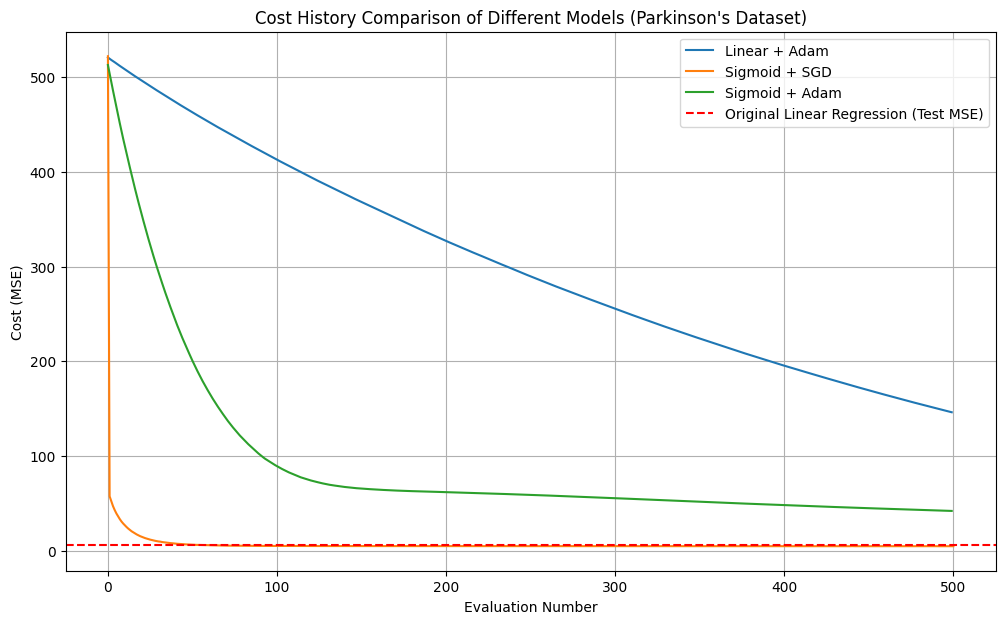


Performance Comparison (Parkinson's Dataset):

Original Linear Regression:
  MSE: 6.0024, RMSE: 2.4500, R2: 0.9060

Linear + Adam:
  MSE: 146.6751, RMSE: 12.1109, R2: -1.2979

Sigmoid + SGD:
  MSE: 4.8182, RMSE: 2.1950, R2: 0.9245

Sigmoid + Adam:
  MSE: 39.9171, RMSE: 6.3180, R2: 0.3746


In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


def sigmoid_basis(X):
    """Sigmoid basis function."""
    return 1 / (1 + np.exp(-X))

# Split the Parkinson's data into training and testing sets (if not already split)
X_train_pk, X_test_pk, y_train_pk, y_test_pk = train_test_split(pk_features_scaled, pk_target, test_size=0.2, random_state=42)

# --- Evaluate the four specified models ---

models_to_compare = {
    "Original Linear Regression": {"basis_fn": None, "optimizer": "sgd", "learning_rate": 1e-2}, # Using SGD with the same parameters as the original LinearRegressionOptimizer
    "Linear + Adam": {"basis_fn": None, "optimizer": "adam", "learning_rate": 1e-3},
    "Sigmoid + SGD": {"basis_fn": sigmoid_basis, "optimizer": "sgd", "learning_rate": 5e-2},
    "Sigmoid + Adam": {"basis_fn": sigmoid_basis, "optimizer": "adam", "learning_rate": 1e-3},
}

results = {}
histories = {}

# Evaluate the Original Linear Regression model separately to get its test MSE
y_pred_test_pk_original = linear_regression_model.predict(X_test_pk)
mse_test_original = mean_squared_error(y_test_pk, y_pred_test_pk_original)
rmse_test_original = np.sqrt(mse_test_original)
r2_test_original = r2_score(y_test_pk, y_pred_test_pk_original)

results["Original Linear Regression"] = {"MSE": mse_test_original, "RMSE": rmse_test_original, "R2": r2_test_original}
histories["Original Linear Regression"] = [] # Placeholder for plotting

for name, params in models_to_compare.items():
    if name == "Original Linear Regression":
        continue # Skip, already evaluated

    print(f"\nTraining {name}:")

    # Instantiate and train the Basis Regression Optimizer
    optimizer_params = {
        "learning_rate": params["learning_rate"],
        "max_iters": 10000,
        "batch_size": 64,
        "eval_every": 20,
        "constraint": 1e-7
    }
    model = BasisRegressionOptimizer(basis_fn=params["basis_fn"], optimizer=params["optimizer"], **optimizer_params)

    model.fit(X_train_pk, y_train_pk)

    # Make predictions and evaluate on the test set
    yhat = model.predict(X_test_pk)
    mse = mean_squared_error(y_test_pk, yhat)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_pk, yhat)

    results[name] = {"MSE": mse, "RMSE": rmse, "R2": r2}
    histories[name] = model.history_

    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R2: {r2:.4f}")

# Plot cost histories for comparison
plt.figure(figsize=(12, 7))
for name, history in histories.items():
    if name != "Original Linear Regression":
        plt.plot(history, label=name)

# Add horizontal line for the original Linear Regression test MSE
plt.axhline(y=results["Original Linear Regression"]["MSE"], color='r', linestyle='--', label='Original Linear Regression (Test MSE)')

plt.xlabel("Evaluation Number")
plt.ylabel("Cost (MSE)")
plt.title("Cost History Comparison of Different Models (Parkinson's Dataset)")
plt.legend()
plt.grid(True)
plt.show()

# Display performance comparison
print("\nPerformance Comparison (Parkinson's Dataset):")
for name, metrics in results.items():
    print(f"\n{name}:")
    print(f"  MSE: {metrics['MSE']:.4f}, RMSE: {metrics['RMSE']:.4f}, R2: {metrics['R2']:.4f}")